In [1]:
# importing relevant libraries and packages for the assessment
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# entering the path directory of the downloaded csv file as a variable named 'url'
url = "~/Downloads/energydata_complete.csv"

In [42]:
# reading the csv file into a dataframe and visualizing it
df = pd.read_csv(url)
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


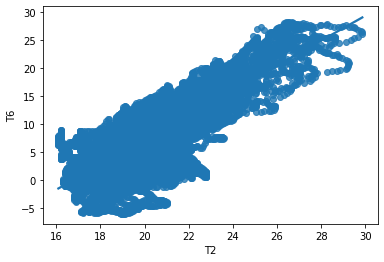

In [21]:
# fitting a line for T2 and T6 just for the purpose of visualization
Fit_line = sns.regplot(x="T2", y="T6", data=df)
Fit_line

In [39]:
#importing sklearn packages for fitting a linear_model and evaluating r2 score
import sklearn.linear_model as lm
from sklearn.metrics import r2_score

In [40]:
# extracting column T2 and T6 as x and y from the dataframe and fitting a linear_model
x = df[['T2']]
y = df[['T6']]

ln_model = lm.LinearRegression()
ln_model.fit(x,y)

LinearRegression()

In [41]:
# evaluating the r2_score of the model fitted on columns T2 as x and column T6 as y
predictions = ln_model.predict(x)
R2_value = r2_score(y, predictions)
R2_value # Question 12: answer is 0.64189 in 2d.p is 0.64

0.6418990830855493

In [46]:
# importing the MinMaxScaler for normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# removing the date and lights columns before normalisation
features_df = df.drop(columns=['date','lights'])

In [50]:
# visualising the dataframe after removing date and lights columns
features_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [67]:
#normalising the dataframe after removing the 'date' and 'lights' columns
normalised_df = pd.DataFrame(scaler.fit_transform(features_df), columns = features_df.columns)
normalised_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [69]:
# aquiring the target variable and training variables
target = normalised_df['Appliances']
train_normalised_df = normalised_df.drop(columns=['Appliances'])
# based on my understanding the target column should also be dropped for the training df as the training df should not see the targets

In [70]:
# splitting the normalised dataframe in 70:30 train test with a random state of 42
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_normalised_df, target, test_size=0.3, random_state=42)

In [71]:
# training the multivariate model
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
# visualizing the training dependent variables
x_train

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,0.497360,0.236767,0.122850,0.565939,0.373878,0.303474,0.476577,0.264760,0.408027,0.159533,...,0.475893,0.376380,0.168810,0.862791,0.776316,0.142857,0.984615,0.192308,0.724554,0.724554
2453,0.286167,0.482616,0.188999,0.669978,0.217957,0.735317,0.270270,0.691421,0.178691,0.333576,...,0.240375,0.703504,0.262594,0.836434,0.807018,0.142857,0.600000,0.342383,0.864041,0.864041
9152,0.422386,0.230529,0.057427,0.606430,0.373878,0.338059,0.414414,0.236449,0.378404,0.151639,...,0.468262,0.409803,0.110397,0.853488,0.859649,0.095238,0.917949,0.158371,0.499502,0.499502
12694,0.560718,0.446840,0.280834,0.704002,0.514290,0.515189,0.540541,0.486556,0.509317,0.424604,...,0.561915,0.340784,0.444802,0.559690,0.750000,0.119048,0.384615,0.558069,0.323173,0.323173
16952,0.835269,0.422071,1.000000,0.318493,0.745383,0.459106,0.900901,0.516432,0.748845,0.455819,...,0.854318,0.633278,0.849946,0.530233,0.355263,0.142857,0.600000,0.787330,0.341060,0.341060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.524815,0.381892,0.239157,0.636236,0.481888,0.478268,0.576577,0.517712,0.455805,0.250877,...,0.568852,0.471578,0.468382,0.492248,0.706140,0.476190,0.600000,0.562594,0.910318,0.910318
11964,0.591341,0.458949,0.428883,0.607461,0.456962,0.582489,0.557658,0.702518,0.417582,0.285310,...,0.561915,0.625966,0.717042,0.469767,0.552632,0.142857,0.600000,0.791855,0.698711,0.698711
5390,0.369588,0.238785,0.152653,0.481582,0.240944,0.412370,0.279279,0.325651,0.302914,0.161743,...,0.312175,0.426325,0.126474,0.595349,0.828947,0.261905,0.948718,0.165913,0.381388,0.381388
860,0.527983,0.234933,0.315047,0.412016,0.332336,0.380122,0.540541,0.341585,0.259914,0.245539,...,0.375650,0.509106,0.227224,0.831008,0.530702,0.095238,0.600000,0.114630,0.020909,0.020909


In [73]:
#predicted values of the model
predicted_values = model.predict(x_test)

In [74]:
#Mean Absolute Error of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [83]:
# Residual sum of squares of the model
((predicted_values - y_test) ** 2).sum()

45.34762967266377

In [76]:
# root mean squared error of the model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.088

In [84]:
# coefficient of determination
from sklearn.metrics import r2_score
coeff_of_Det = r2_score(y_test, predicted_values)
coeff_of_Det # the coefficient of determination of question 16

0.14890246319303535

In [86]:
#obtain feature_weights from your linear_model
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight')
linear_model_weights #from the table below RH_2 has the lowest weighted features and RH_1 has the highest

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [87]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [90]:
#training a ridge regression model
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
predicted_vals = ridge_reg.predict(x_test)


In [91]:
#evaluating the new rmse with the ridge regression model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_vals))
round(rmse,3)

0.088

In [92]:
#training a lasso regression model
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
predicted_lals = lasso_reg.predict(x_test)

In [93]:
# obtain new feature weights with the trained lasso-regression model
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [94]:
# what is the new rmse with the lasso regression?
from sklearn.metrics import mean_squared_error
rmse_lasso = np.sqrt(mean_squared_error(y_test,predicted_lals))
round(rmse_lasso,3)

0.094